## Wrangling the Billboard Top 100

In [2]:
import pandas as pd
%pylab inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
billboard=pd.read_csv(r"C:\Users\there\Downloads\billboard.csv")
billboard = billboard[['performer','song','year','week','week_position']]
billboard.head()

,performer,song,year,week,week_position
0,Patty Duke,Don't Just Stand There,1965,29,34
1,Patty Duke,Don't Just Stand There,1965,30,22
2,Patty Duke,Don't Just Stand There,1965,31,14
3,Patty Duke,Don't Just Stand There,1965,32,10
4,Patty Duke,Don't Just Stand There,1965,33,8


### Part A

In [4]:
billboard.groupby(['performer','song']).agg({'week':'count'}).sort_values(by='week',ascending=False)[:10].rename(columns={'week':'count'}).reset_index()

,performer,song,count
0,Imagine Dragons,Radioactive,87
1,AWOLNATION,Sail,79
2,The Weeknd,Blinding Lights,76
3,Jason Mraz,I'm Yours,76
4,LeAnn Rimes,How Do I Live,69
5,OneRepublic,Counting Stars,68
6,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
7,Jewel,Foolish Games/You Were Meant For Me,65
8,Adele,Rolling In The Deep,65
9,Carrie Underwood,Before He Cheats,64


### Part B

C:\Users\there\AppData\Local\Temp\ipykernel_34024\2684855222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_filt['unique_song']=  billboard_filt['performer']+'_'+billboard_filt['song']


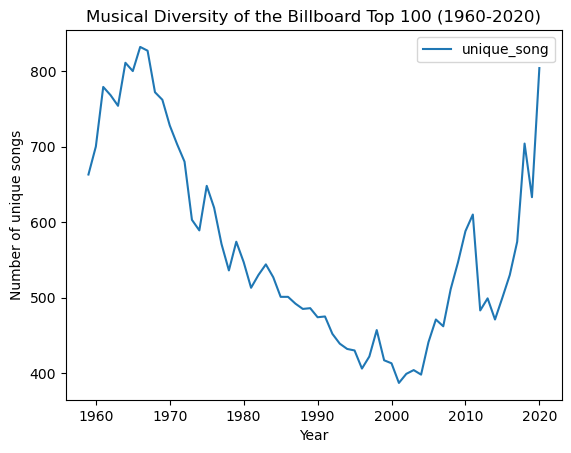

In [5]:
billboard_filt=billboard[~billboard['year'].isin([1958,2021])]
billboard_filt['unique_song']=  billboard_filt['performer']+'_'+billboard_filt['song']
billboard_filt=billboard_filt.groupby('year').agg({'unique_song':'nunique'}).plot()
xlabel('Year')
ylabel('Number of unique songs')
title('Musical Diversity of the Billboard Top 100 (1960-2020)')
show()

### Part C

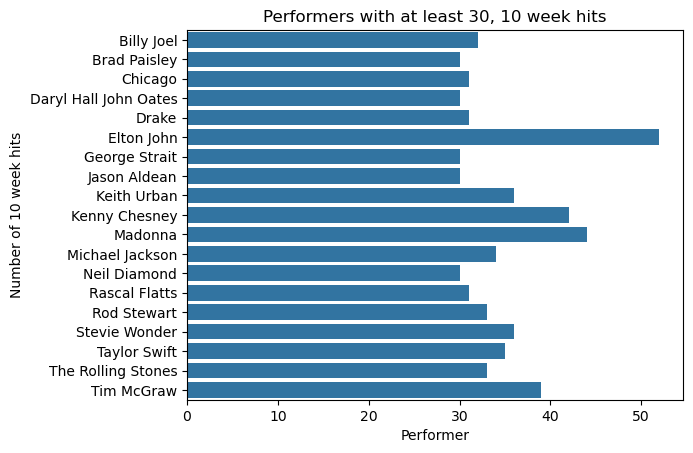

In [6]:
df=billboard.groupby(['song','performer']).agg({'week':'count'}).reset_index()
df=df[df['week']>=10]
df=df.groupby('performer').agg({'song':'count'}).reset_index()
df=df[df['song']>=30]
sns.barplot(x="song", y="performer", data=df)
xlabel('Performer')
ylabel('Number of 10 week hits')
title('Performers with at least 30, 10 week hits')
show()